# Introduction
This following Python program aims to rearrange the given folder and its subfolders in ordered way. My intention for creating this program is that I have a large collection of Videos and some of them are in folers others are without any folder, some program have subtitle and there are duplicate Videos present also there is a problem with the name of the files. So I'm Writing this program so that every file have a correct name and folder with subtitle file with the same name. I will also try to prepare a log file for the activities that are being performed and another log file for missing srt(subtitle file) files.

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction

In [2]:
def ret_content(path):
    
    if not path.endswith('/'):
        path += '/'
    
    files = []
    file_path = []
    
    for file in os.listdir(path):
        
        file_name, extension = os.path.splitext(file)

        if extension=='' and not file_name.startswith('.'):
            rec_file, rec_path = ret_content(path+file)
            files.extend(rec_file)
            file_path.extend(rec_path)
        
        else:
            files += [(file_name,extension)]
            file_path.append(path+file)
    
    return files, file_path

In [3]:
files, file_paths = ret_content('/media/ketan/Seagate Expansion Drive/Movies')
# files, file_paths = ret_content("/home/ketan/Videos/vehicles")

In [4]:
for file in files:
    print(file)

('Mission Impossible 4', '.mkv')
('Mission Impossible Rogue Nation', '.mkv')
('Mission Impossible', '.mkv')
('71.2014.720p.BluRay.x264.YIFY', '.mp4')
('(2005)The Exorcism of Emily Rose', '.mp4')
('000 Point Break', '.mkv')
('03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4]', '.mp4')
('17.Again.2009.720p.BrRip.x264.YIFY', '.mp4')
('17.Again.2009.720p.BrRip.x264.YIFY', '.srt')
('WWW.YIFY-TORRENTS.COM', '.jpg')
('3 Musketeers', '.avi')
('300  Rise', '.mkv')
('300', '.mkv')
('300 Rise of an Empire', '.mp4')
('300', '.mkv')
('310.to.Yuma.2007.720p.BrRip.x264.BOKUTOX.YIFY', '.mp4')
('Catch.Me.If.You.Can.2002.720p.BluRay.x264.YIFY', '.mp4')
('WWW.YIFY-TORRENTS.COM', '.jpg')
('3B34b13.WorldFree4u.Com', '.mkv')
('Deadpool 2 2018 1080p HC HDRip x264 Dual Audio [Hindi - English] [MW]', '.mkv')
('Deadpool subs', '.srt')
('Deadpool', '.mp4')
('Death Race 2 ', '.mkv')
('Death Race 3 ', '.mkv')
('Den of thieves', '.mkv')
('Den Of Thieves', '.srt')
('Den.Of.Thieves.2018.1080p.BluRay.x264-[YTS.

In [5]:
for path in file_paths:
    print(path)

/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible 4.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible Rogue Nation.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/'71 (2014)/71.2014.720p.BluRay.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/(2005)The Exorcism of Emily Rose.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/000 Point Break.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4].mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.srt
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/WWW.YIFY-TORRENTS.COM.jpg
/med

# Data Visualization

In [6]:
data = pd.DataFrame(files, columns = ['file_name', 'extension'])
data.head()

,file_name,extension
0,Mission Impossible 4,.mkv
1,Mission Impossible Rogue Nation,.mkv
2,Mission Impossible,.mkv
3,71.2014.720p.BluRay.x264.YIFY,.mp4
4,(2005)The Exorcism of Emily Rose,.mp4


In [7]:
for i in data.extension.unique():
    print(i)

.mkv
.mp4
.srt
.jpg
.avi
.1 E-Subs - LOKI - M2Tv
.1 [DDR]
.txt
.db
.AG]
.bc!
.ini
.Dual Audio [Hin-Eng] - Team ExD
.MKV
.anoXmous
.idx
.sub
.Runner (1997)
.YIFY
.ass
.AM]
.A Confidential (1997)
.zip
.FLV
.dat
.0] - Mafiaking
.XviD-DiVERSE
.flv
.XViD-ETRG
.1]--prisak~~{HKRG}
.HEVC-PSA


In [8]:
extension_count = []
for ext in data.extension.unique():
    c = data[data.extension == ext].count()
    extension_count.append(c.extension)
extension_count

[360,
 236,
 135,
 92,
 32,
 1,
 1,
 53,
 7,
 29,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 10,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1]

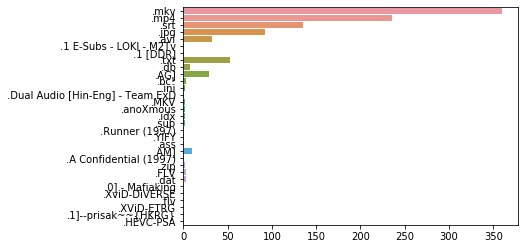

In [10]:
sns.barplot(extension_count, list(data.extension.unique()), )